 Implement in python SVM/Softmax classifier for CIFAR-10 dataset.
 Procedure:
 1. Load the CIFAR-10
 2. Preprocess the data
 a. Normalize the pixel values to be between 0 and 1.
 b. Convert the class labels to one-hot encoded vectors.
 3. Build the model
 4. Train the data with SVM classifier
 5. Train the data with   Softmax classifier using KNN
 6. Make predictions with the SVM/Softmax classifier.
     DE

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
# from tensorflow.keras.datasets import cifar10

# 1. Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. Preprocess data
# a. Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images (32x32x3 -> 3072)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# b. Convert labels to one-hot (not needed for SVM but included as per requirement)
lb = LabelBinarizer()
y_train_onehot = lb.fit_transform(y_train)
y_test_onehot = lb.transform(y_test)

# For SVM we use original labels (not one-hot)
y_train = y_train.ravel()
y_test = y_test.ravel()

# 3. Build and 4. Train SVM classifier
# Using linear SVM for efficiency (for exam purposes)
svm_clf = svm.LinearSVC(max_iter=10000, C=1.0)
svm_clf.fit(X_train, y_train)

# 6. Make predictions
train_pred = svm_clf.predict(X_train)
test_pred = svm_clf.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.4474
Test Accuracy: 0.3770


In [2]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.datasets import cifar10

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0
y_train, y_test = y_train.ravel(), y_test.ravel()

# Create pipeline with standardization, PCA and RBF SVM
pipeline = make_pipeline(
    StandardScaler(),  # Standardize features
    PCA(n_components=100, whiten=True),  # Reduce to top 100 components
    svm.SVC(C=10, kernel='rbf', gamma=0.001, random_state=42)  # RBF kernel
)

# Train on smaller subset for demo (remove [::10] for full training)
pipeline.fit(X_train[::10], y_train[::10])

# Evaluate
train_pred = pipeline.predict(X_train[::10])
test_pred = pipeline.predict(X_test[::10])

print(f"Training Accuracy: {accuracy_score(y_train[::10], train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test[::10], test_pred):.4f}")

Training Accuracy: 0.5696
Test Accuracy: 0.3960


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3882 - loss: 1.6822 - val_accuracy: 0.5769 - val_loss: 1.1951
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5903 - loss: 1.1615 - val_accuracy: 0.6268 - val_loss: 1.0644
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6516 - loss: 0.9979 - val_accuracy: 0.6524 - val_loss: 1.0074
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6918 - loss: 0.8941 - val_accuracy: 0.6828 - val_loss: 0.9173
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7233 - loss: 0.7960 - val_accuracy: 0.6806 - val_loss: 0.9270
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7488 - loss: 0.7251 - val_accuracy: 0.6903 - val_loss: 0.8979
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7777 - loss: 0.6499 - val_accuracy: 0.6998 - val_loss: 0.8903
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7999 - loss: 0.5837 - 

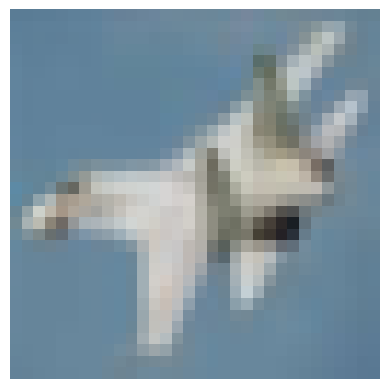

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted class: airplane
Confidence: 70.28%


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Normalize and one-hot encode
X_train, X_test = x_train/255.0, x_test/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Improved model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile with learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with early stopping
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(X_test, y_test),
                    verbose=1)

# Prediction example (unchanged from original)
new_img = x_test[10]
plt.imshow(new_img)
plt.axis("off")
plt.show()

img = np.expand_dims(new_img/255.0, axis=0)
pred = model.predict(img)
prediction = np.argmax(pred)
print(f"Predicted class: {classes[prediction]}")
print(f"Confidence: {np.max(pred)*100:.2f}%")